## Confusion Matrix of Iris Dataset using NCM

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
iris = load_iris()

features = iris.data
target = iris.target
target_names = iris.target_names

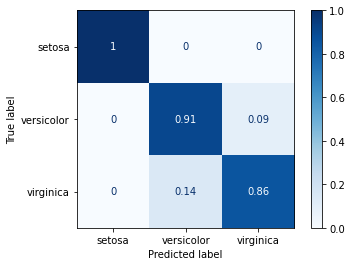

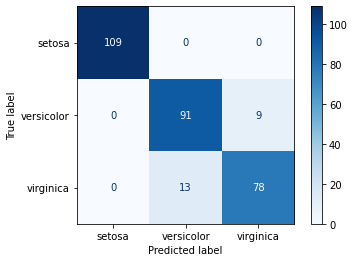

In [9]:
from collections import Counter

max_seed = 10

predict_list = []
label_list = []
error_value = []
error_seed = []
error = []
error_list = []

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    nc = NearestCentroid()
    nc.fit(x_train, y_train)
    predict = nc.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for idx in idx[0]:
            values = x_test[idx]
            values_seed = np.append(values, seed)
            values = np.append(values, y_test[idx])
            error_value.append(values)
            error_seed.append(values_seed)

error_value = np.array(error_value)
counter = Counter(map(tuple, error_value.tolist()))

max_list = list(counter.values())
max_count = np.max(max_list)

for key, value in counter.items():
    if value == max_count:
        error.append(key)

error_seed = np.array(error_seed)
error = np.array(error)

for idx, e_list in enumerate(error):
    for s_idx, seed_list in enumerate(error_seed):
        error_equal = np.array_equal(seed_list[:4], e_list[:4])
        if error_equal:
            add_seed = np.append(error[idx], seed_list[-1])
            error_list.append(add_seed)

cm = confusion_matrix(label_list, predict_list, labels=nc.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=nc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

In [10]:
from scipy.spatial.distance import euclidean

for e in error_list:
    dist_arr = []
    print("Seed : ", int(e[-1]))
    print("Error data value : ", e[:4], " / label : ", int(e[-2]))

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=int(e[-1]), shuffle=True)
    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    mean_list = nc.centroids_
    mean_list.reshape(3, -1)
    label = ["0", "1", "2"]
    
    for s, mean_value in enumerate(mean_list):
        dist = euclidean(e[:4], mean_value)
        dist_arr.append(dist)

    dist = np.argsort(dist_arr)

    for s, d in enumerate(dist):
        print(s+1, "th close mean value : ", mean_list[d], " / label : ", label[d], " / distance : ", dist_arr[d])
    print("-----" * 11)

Seed :  1
Error data value :  [6.7 3.  5.  1.7]  / label :  1
1 th close mean value :  [6.525      2.95227273 5.53409091 2.02045455]  / label :  2  / distance :  0.6487272982062768
2 th close mean value :  [5.94594595 2.73243243 4.22972973 1.30540541]  / label :  1  / distance :  1.178647997917482
3 th close mean value :  [4.96153846 3.36666667 1.46666667 0.23333333]  / label :  0  / distance :  4.218085883515182
-------------------------------------------------------
Seed :  2
Error data value :  [6.7 3.  5.  1.7]  / label :  1
1 th close mean value :  [6.5952381  2.98095238 5.55952381 2.03333333]  / label :  2  / distance :  0.6599362643588177
2 th close mean value :  [5.90714286 2.76190476 4.23333333 1.30952381]  / label :  1  / distance :  1.193968686561669
3 th close mean value :  [5.07222222 3.5        1.44722222 0.24722222]  / label :  0  / distance :  4.199101535293438
-------------------------------------------------------
Seed :  7
Error data value :  [6.7 3.  5.  1.7]  / lab